### Importing necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.inception_v3 import InceptionV3

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import cv2

In [2]:
directory = "D:/machine learning/NalaiyaThiran/flowers"

In [3]:
# Different classes of flowers
classes=[]
for file in os.listdir(directory):
    classes+=[file]
print(classes)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


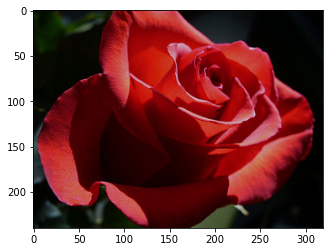

In [4]:
img = cv2.imread(r"D:/machine learning/NalaiyaThiran/flowers/rose/394990940_7af082cf8d_n.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

### Augmentation

In [5]:
img_data_generator = {
    "train_set": ImageDataGenerator(horizontal_flip=True,
                                    vertical_flip=True,
                                    rescale=1./255,
                                    zoom_range=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rotation_range=45,
                                    validation_split=0.2)
    .flow_from_directory(directory=directory,
                         target_size=(300, 300),
                         subset="training"),
    "valid_set": ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2)
    .flow_from_directory(directory=directory,
                         target_size=(300, 300),
                         subset="validation")
}

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


### Inception Model

In [6]:
inception = InceptionV3(weights="imagenet",
                        include_top=False,
                        input_shape=(300, 300, 3))

inception.trainable = False

In [7]:
# Adding additional layers
model = Sequential([
    inception,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dense(5, activation='softmax')
])

### Compiling model

In [8]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 23,906,085
Trainable params: 2,103,301
Non-trainable params: 21,802,784
____________________________________

### Training

In [11]:
batch_size = 32
epochs = 10

train_data_generator = img_data_generator["train_set"]
valid_data_generator = img_data_generator["valid_set"]

In [12]:
history = model.fit(train_data_generator,
                    epochs=epochs,
                    steps_per_epoch=train_data_generator.n // batch_size,
                    validation_data=valid_data_generator,
                    validation_steps=valid_data_generator.n // batch_size)

Epoch 1/10
108/108 [==============================] - 147s 1s/step - loss: 0.5243 - accuracy: 0.8131 - val_loss: 0.4867 - val_accuracy: 0.8198
Epoch 2/10
108/108 [==============================] - 127s 1s/step - loss: 0.4505 - accuracy: 0.8368
Epoch 3/10
108/108 [==============================] - 127s 1s/step - loss: 0.4473 - accuracy: 0.8418
Epoch 4/10
108/108 [==============================] - 118s 1s/step - loss: 0.4435 - accuracy: 0.8371
Epoch 5/10
108/108 [==============================] - 118s 1s/step - loss: 0.3819 - accuracy: 0.8599
Epoch 6/10
108/108 [==============================] - 117s 1s/step - loss: 0.3711 - accuracy: 0.8631
Epoch 7/10
108/108 [==============================] - 116s 1s/step - loss: 0.3598 - accuracy: 0.8639
Epoch 8/10
108/108 [==============================] - 118s 1s/step - loss: 0.3900 - accuracy: 0.8564
Epoch 9/10
108/108 [==============================] - 117s 1s/step - loss: 0.3633 - accuracy: 0.8660
Epoch 10/10
108/108 [============================

### Saving the model

In [13]:
model.save("flower_classification.h5")

In [14]:
# Custom function for prediction
best_model = keras.models.load_model("flower_classification.h5")

def predict(img_rel_path):
    img = image.load_img(img_rel_path, target_size=(300, 300))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0
    
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()
    
    pred = best_model.predict(img[np.newaxis, ...])
    
    labels = {0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}

    predicted_class = labels[np.argmax(pred[0], axis=-1)]
    print(predicted_class)
    print(np.max(pred[0], axis=-1))

### Testing the model

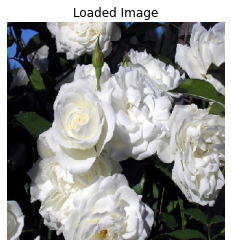

rose
0.9184678


In [15]:
predict("D:/machine learning/NalaiyaThiran/flowers/rose/410421672_563550467c.jpg")

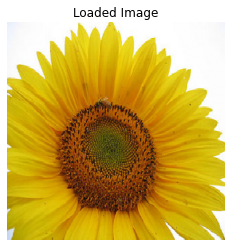

sunflower
0.99205095


In [21]:
predict("D:/machine learning/NalaiyaThiran/flowers/sunflower/40410963_3ac280f23a_n.jpg")

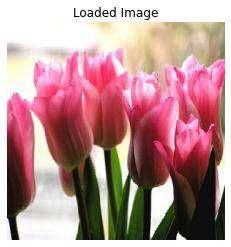

tulip
0.99533916


In [17]:
predict("D:/machine learning/NalaiyaThiran/flowers/tulip/112650879_82adc2cc04_n.jpg")

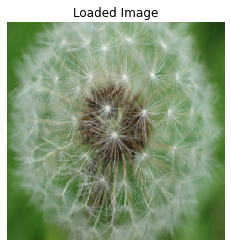

dandelion
0.9999231


In [18]:
predict("D:/machine learning/NalaiyaThiran/flowers/dandelion/80846315_d997645bea_n.jpg")

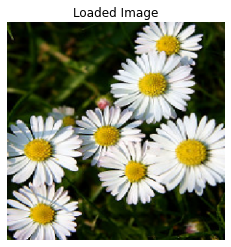

daisy
0.9999864


In [19]:
predict("D:/machine learning/NalaiyaThiran/flowers/daisy/144076848_57e1d662e3_m.jpg")